# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing for Regression and Neutral Network

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Reading Dataset

In [64]:
df = pd.read_csv("/content/quantvision_financial_dataset_200.csv")
df.head()

,lookback_days,asset_type,market_regime,high_volatility,trend_continuation,technical_score,edge_density,slope_strength,candlestick_variance,pattern_symmetry,future_trend
0,48,equity,bullish,0,1,59.99,0.504,0.298,1.572,0.768,1
1,38,index,bullish,1,1,78.54,0.559,0.037,0.692,0.538,1
2,24,equity,bullish,1,0,56.03,0.617,0.212,1.419,0.301,1
3,52,equity,bullish,0,0,66.51,0.360,0.347,0.699,0.498,1
4,17,equity,bullish,1,1,61.21,0.492,0.144,2.520,0.828,1


In [65]:
X=df.drop("future_trend",axis=1)
y=df["future_trend"]

In [66]:
categorical_cols = [
    "asset_type",
    "market_regime"
]
numerical_cols = [
    "lookback_days",
    "high_volatility",
    "trend_continuation",
    "technical_score",
    "edge_density",
    "slope_strength",
    "candlestick_variance",
    "pattern_symmetry"
]

# Preprocessing Pipeline

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

# Train–Test Split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regresssion Model

In [69]:
reg_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])
reg_pipeline.fit(X_train, y_train)
y_pred_lr = reg_pipeline.predict(X_test)

# Logistic Regression Evaluation

In [70]:
print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.925
Precision: 0.9473684210526315
Recall: 0.972972972972973
F1-score: 0.96

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.95      0.97      0.96        37

    accuracy                           0.93        40
   macro avg       0.72      0.65      0.68        40
weighted avg       0.91      0.93      0.92        40



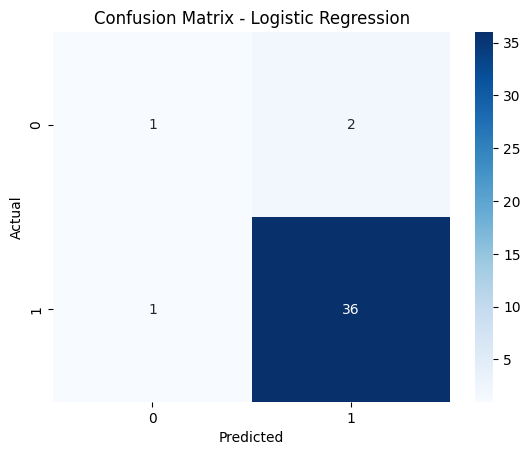

In [71]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Neural Network Model

In [72]:
mlp_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    ))
])
mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)


# Neural Network Evaluation

NEURAL NETWORK (MLP) RESULTS
Accuracy: 0.95
Precision: 0.972972972972973
Recall: 0.972972972972973
F1-score: 0.972972972972973

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.97      0.97      0.97        37

    accuracy                           0.95        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.95      0.95      0.95        40



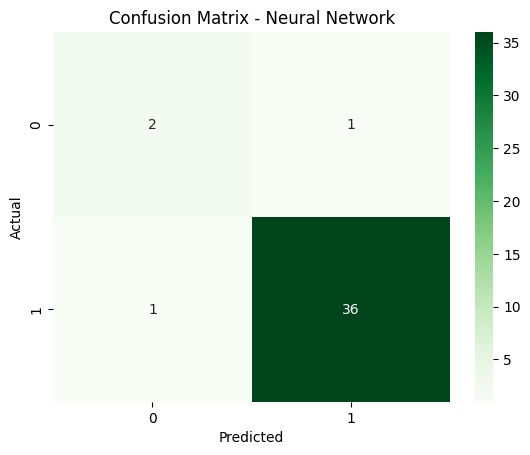

In [73]:
print("NEURAL NETWORK (MLP) RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1-score:", f1_score(y_test, y_pred_mlp))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mlp))

cm_mlp = confusion_matrix(y_test, y_pred_mlp)

sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model Comparison

In [74]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_mlp)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_mlp)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_mlp)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_mlp)
    ]
})
results

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.925,0.947368,0.972973,0.960000
1,Neural Network,0.950,0.972973,0.972973,0.972973


**Neural Netwok Model is better as accuracy is higher in the NN model compared to the LR model.**

1. **Why does Logistic Regression model works reasonably good**?       
*Answer*.  Logistic Regression works well when the data is linearly consistent and results in closer outputs but fails when the dataset has very deviation from linear output.

2. **Why Neural Network performs better?**    
*Answer*. Because it works well in non linear relations and handles volatility and sensitivity in a much better way.

3. **What is the effect of Volatility?**   
*Answer*. If there is higher Volatility then the prediction confidence is low.

4. **What is the role of trend continuation?**   
*Answer*. Trend Continuation is a strong future price movement predictor and helps in both the models.

5. **Where the models fail?**   
*Answer*. The model fails in the following cases:
*   Sideways Market Shifts
*   Sudden regime shifts
*   Extremely high volatility periods



